# MNIST: Introduction to CNN Keras

* **1. Introduction**
* **2. Data preparation**
    * 2.1 Load data
    * 2.2 Normalization
    * 2.3 Reshape
    * 2.4 Label encoding
    * 2.5 Split training and valdiation set
* **3. Convolution Neural Network**
    * 3.1 Define the model
    * 3.2 Data augmentation
    * 3.3 Model training
* **4. Evaluate the model**
    * 4.1 Training and validation curves
    * 4.2 Confusion matrix
* **5. Prediction and submition**
    * 5.1 Prediction validation results
    * 5.2 Submition


# 1. Introduction


MNIST ("Modified National Institute of Standards and Technology") is the “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. A new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.  In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

**Import all Necessary Libraries**

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.datasets import mnist

# 2. Data preparation
## 2.1 Load data

In [23]:
NUM_CLASSES = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 2.2 Normalization

We perform a grayscale normalization to reduce the effect of illumination's differences. 

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [24]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## 2.3 Reshape

In [25]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

## 2.4 Label encoding

**One-Hot Encoding**

In [26]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

## 2.5 Split training and valdiation set

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

**Data Visualization**

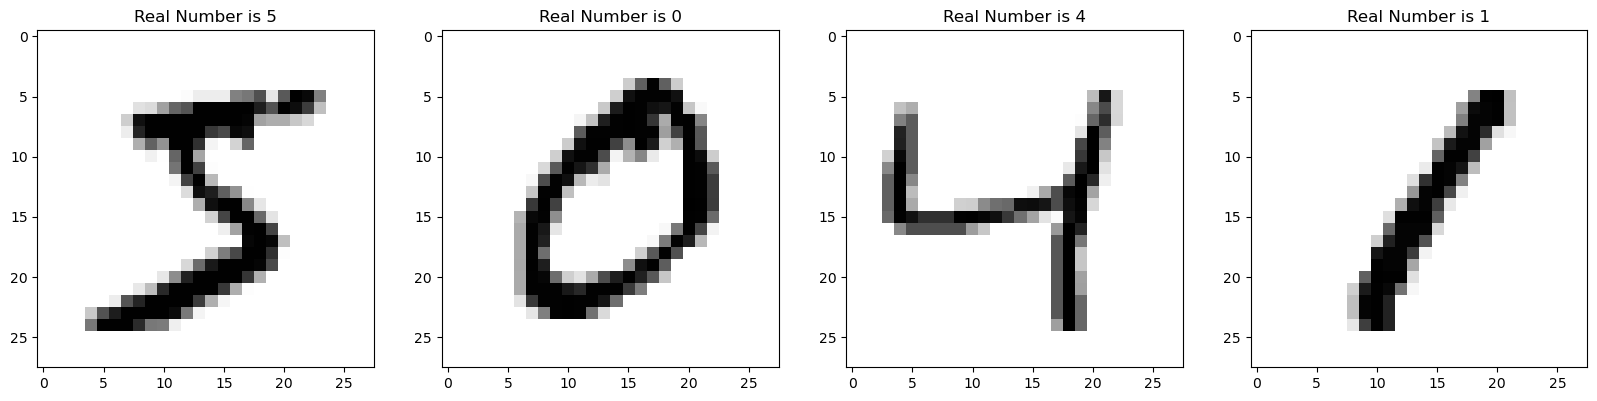

In [28]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

**Normalization**

In [29]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

# 3. CNN
## 3.1 Define the model

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two second layers and 128 filters for two third layers and 256 for the last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important. 

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network. 

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

**Model Definition**

In [30]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

C:\Users\saish\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

## 3.2 Data augmentation

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered 
The scale is not the same (some who write with big/small numbers)
The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. 

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

The improvement is important : 
   - Without data augmentation i obtained an accuracy of 98.114%
   - With data augmentation i achieved 99.67% of accuracy

In [32]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

For the data augmentation, i choosed to :
   - Randomly rotate some training images by 10 degrees
   - Randomly  Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height
   
**I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.**

Once our model is ready, we fit the training dataset .

## 3.3 Model training

In [35]:
model.fit(X_train, y_train, batch_size=200, validation_split=0.2, epochs=5)

Epoch 1/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 140s 537ms/step - accuracy: 0.9307 - loss: 0.2265 - val_accuracy: 0.1060 - val_loss: 5.8085
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 123s 514ms/step - accuracy: 0.9904 - loss: 0.0285 - val_accuracy: 0.9587 - val_loss: 0.1396
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 123s 511ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9788 - val_loss: 0.0670
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 122s 509ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9868 - val_loss: 0.0508
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 129s 537ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9860 - val_loss: 0.0539


### Drive training phase
**EarlyStoping**: Stop training when a monitored metric has stopped improving.

**ReduceLROnPlateau**: Reduce learning rate when a metric has stopped improving.

In [36]:
epochs = 100
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [18]:
# Fit the model
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps, 
                              callbacks=[es, rp])

Epoch 1/100
295/295 [==============================] - 13s 44ms/step - loss: 0.1535 - acc: 0.9516 - val_loss: 0.0806 - val_acc: 0.9771
Epoch 2/100
295/295 [==============================] - 11s 39ms/step - loss: 0.0633 - acc: 0.9803 - val_loss: 0.0780 - val_acc: 0.9772
Epoch 3/100
295/295 [==============================] - 11s 37ms/step - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0740 - val_acc: 0.9791
Epoch 4/100
295/295 [==============================] - 11s 39ms/step - loss: 0.0388 - acc: 0.9881 - val_loss: 0.0436 - val_acc: 0.9855
Epoch 5/100
295/295 [==============================] - 11s 37ms/step - loss: 0.0407 - acc: 0.9879 - val_loss: 0.0465 - val_acc: 0.9872
Epoch 6/100
295/295 [==============================] - 11s 37ms/step - loss: 0.0354 - acc: 0.9893 - val_loss: 0.0480 - val_acc: 0.9848
Epoch 7/100
295/295 [==============================] - 11s 39ms/step - loss: 0.0323 - acc: 0.9905 - val_loss: 0.0506 - val_acc: 0.9840
Epoch 8/100
295/295 [==============================] - 

**Plot CNN model**

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)

# 4. Evaluate the model
## 4.1 Training and validation curves

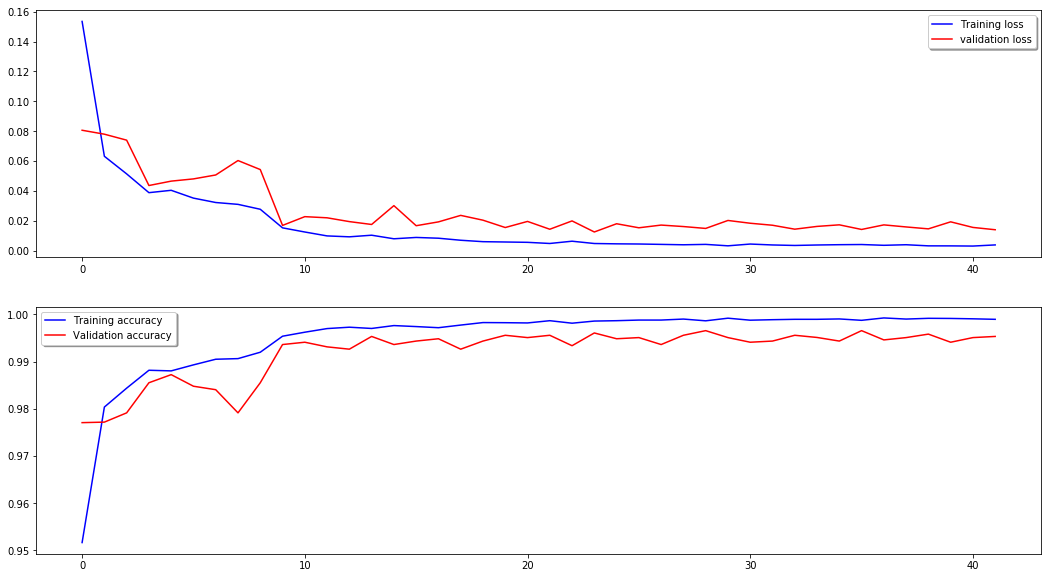

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 4.2 Confusion matrix

Confusion matrix can be very helpfull to see your model drawbacks.

I plot the confusion matrix of the validation results.

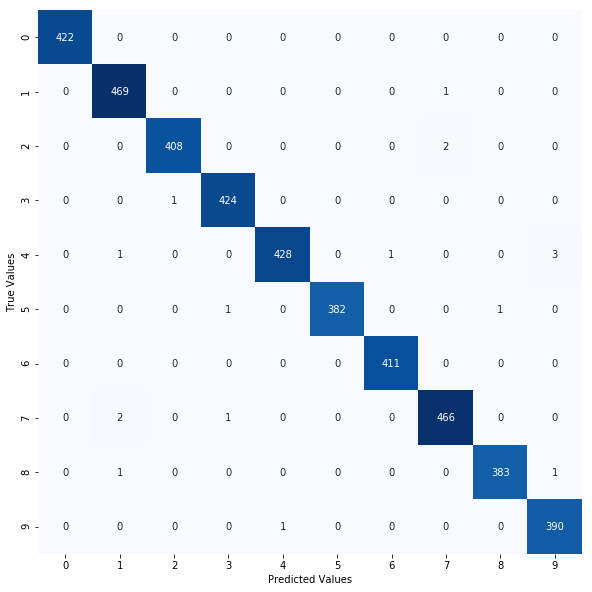

In [21]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# 5. Prediction and submition

## 5.1 Prediction validation results

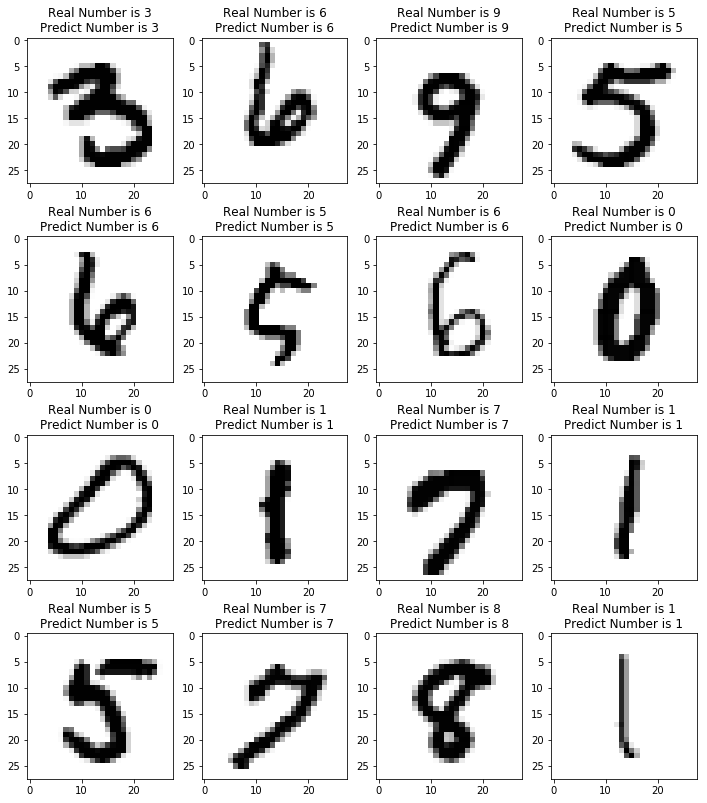

In [22]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

## 5.2 Submition

**Prediciting test classes**

In [23]:
# preprocess test data
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)

# predict test data
pred = model.predict_classes(test_x, verbose=1)

28000/28000 [==============================] - 2s 54us/step


In [24]:
# submissions
sub['Label'] = pred
sub.to_csv("CNN_keras_sub.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


## Neural Architecture Search (NAS)

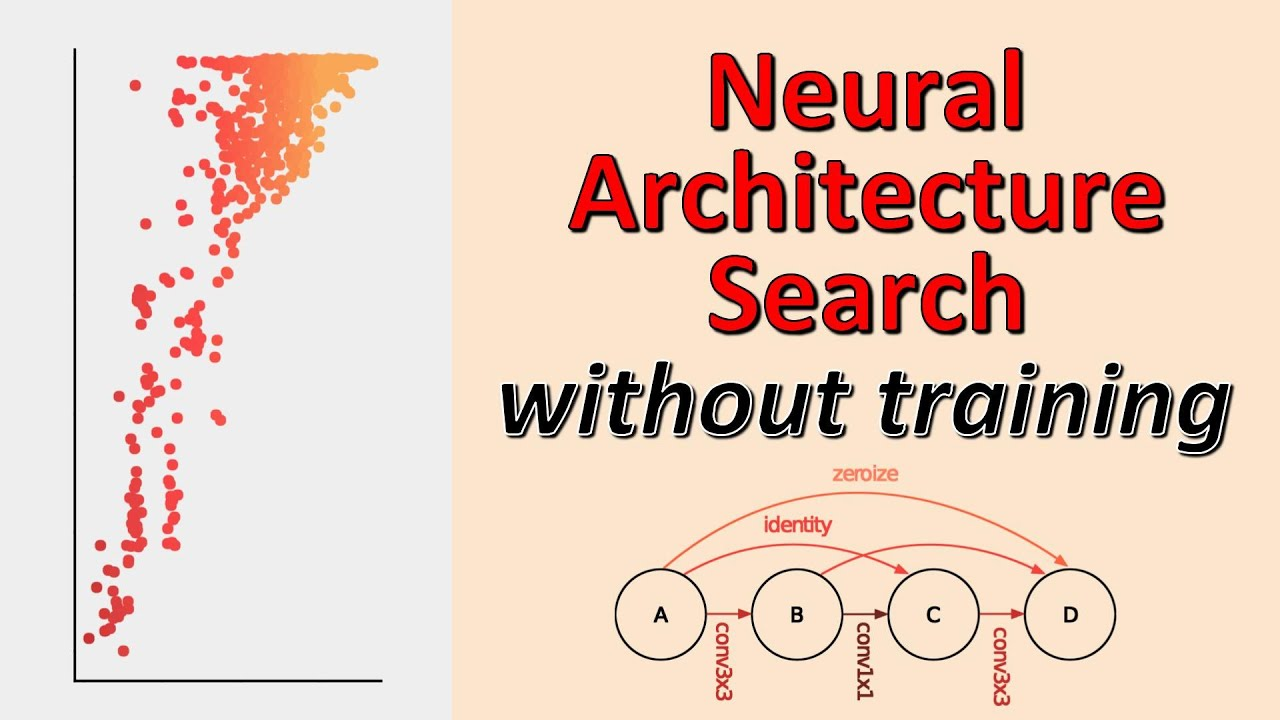

Nas stands for Neural Architecture Search, which is a technique used in the field of deep learning to automatically discover optimal neural network architectures for a given task. Instead of designing architectures manually, NAS leverages algorithms to search through a predefined or generated space of architectures to find the most suitable ones. Here's an overview of the components and considerations involved in NAS:

1. **Search Space**:
   - NAS operates within a search space, which defines the set of possible architectures that the algorithm can explore.
   - Search spaces can vary in complexity, ranging from simple architectures (e.g., varying depths or widths of neural networks) to more intricate designs involving specialized operations or connections.
   - Common types of search spaces include:
     - Cell-based search spaces: Hierarchical structures composed of repeating blocks (cells) with various configurations.
     - SuperNet search spaces: Continuous space where each architecture is represented as a point, allowing for efficient optimization using gradient-based methods.
     - Graph-based search spaces: Neural architectures represented as directed acyclic graphs (DAGs), with nodes representing operations and edges representing connections.

2. **Search Strategies**:
   - Search strategies determine how NAS explores the search space to find promising architectures.
   - Common search strategies include:
     - Random search: Sampling architectures randomly from the search space.
     - Evolutionary algorithms: Using genetic algorithms to evolve and select architectures based on their performance.
     - Reinforcement learning: Training a policy network to generate architectures, with rewards based on validation performance.
     - Bayesian optimization: Modeling the performance of architectures using probabilistic models to guide the search.
     - Gradient-based optimization: Leveraging gradients of validation performance with respect to architecture parameters to iteratively update architectures.
   - Hybrid approaches that combine multiple search strategies are also common.

3. **Evaluation Metrics**:
   - Evaluation metrics are used to assess the performance of candidate architectures during the search process.
   - Common metrics include:
     - Validation accuracy: Accuracy of the model on a held-out validation dataset.
     - Validation loss: Loss function value on the validation dataset.
     - Computational cost: Number of operations or parameters required by the architecture.
     - Memory footprint: Memory usage of the architecture during inference.
     - Latency: Inference time required by the architecture.
   - The choice of evaluation metrics depends on the specific requirements of the task and constraints such as computational resources or deployment considerations.

4. **Advantages of NAS**:
   - Automation: NAS automates the process of architecture design, reducing the need for manual experimentation and domain expertise.
   - Adaptability: NAS can adapt architectures to specific tasks and datasets, potentially leading to improved performance compared to handcrafted designs.
   - Efficiency: By exploring a large search space efficiently, NAS can discover novel architectures that outperform human-designed ones.
   - Scalability: NAS techniques can scale to larger and more complex architectures, enabling the discovery of solutions that might be impractical or infeasible to design manually.
   - Transferability: Architectures discovered using NAS can often be transferred and fine-tuned across different tasks or domains, leveraging learned representations effectively.

Overall, NAS represents a powerful approach for automating the design of neural network architectures, offering the potential to push the boundaries of deep learning performance and applicability. However, it also presents challenges such as computational complexity, search space design, and scalability, which researchers continue to address through innovative methods and algorithms.

In [37]:
# import essentials
from tensorflow import keras
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import nni
from keras.callbacks import Callback

## Defining the search space

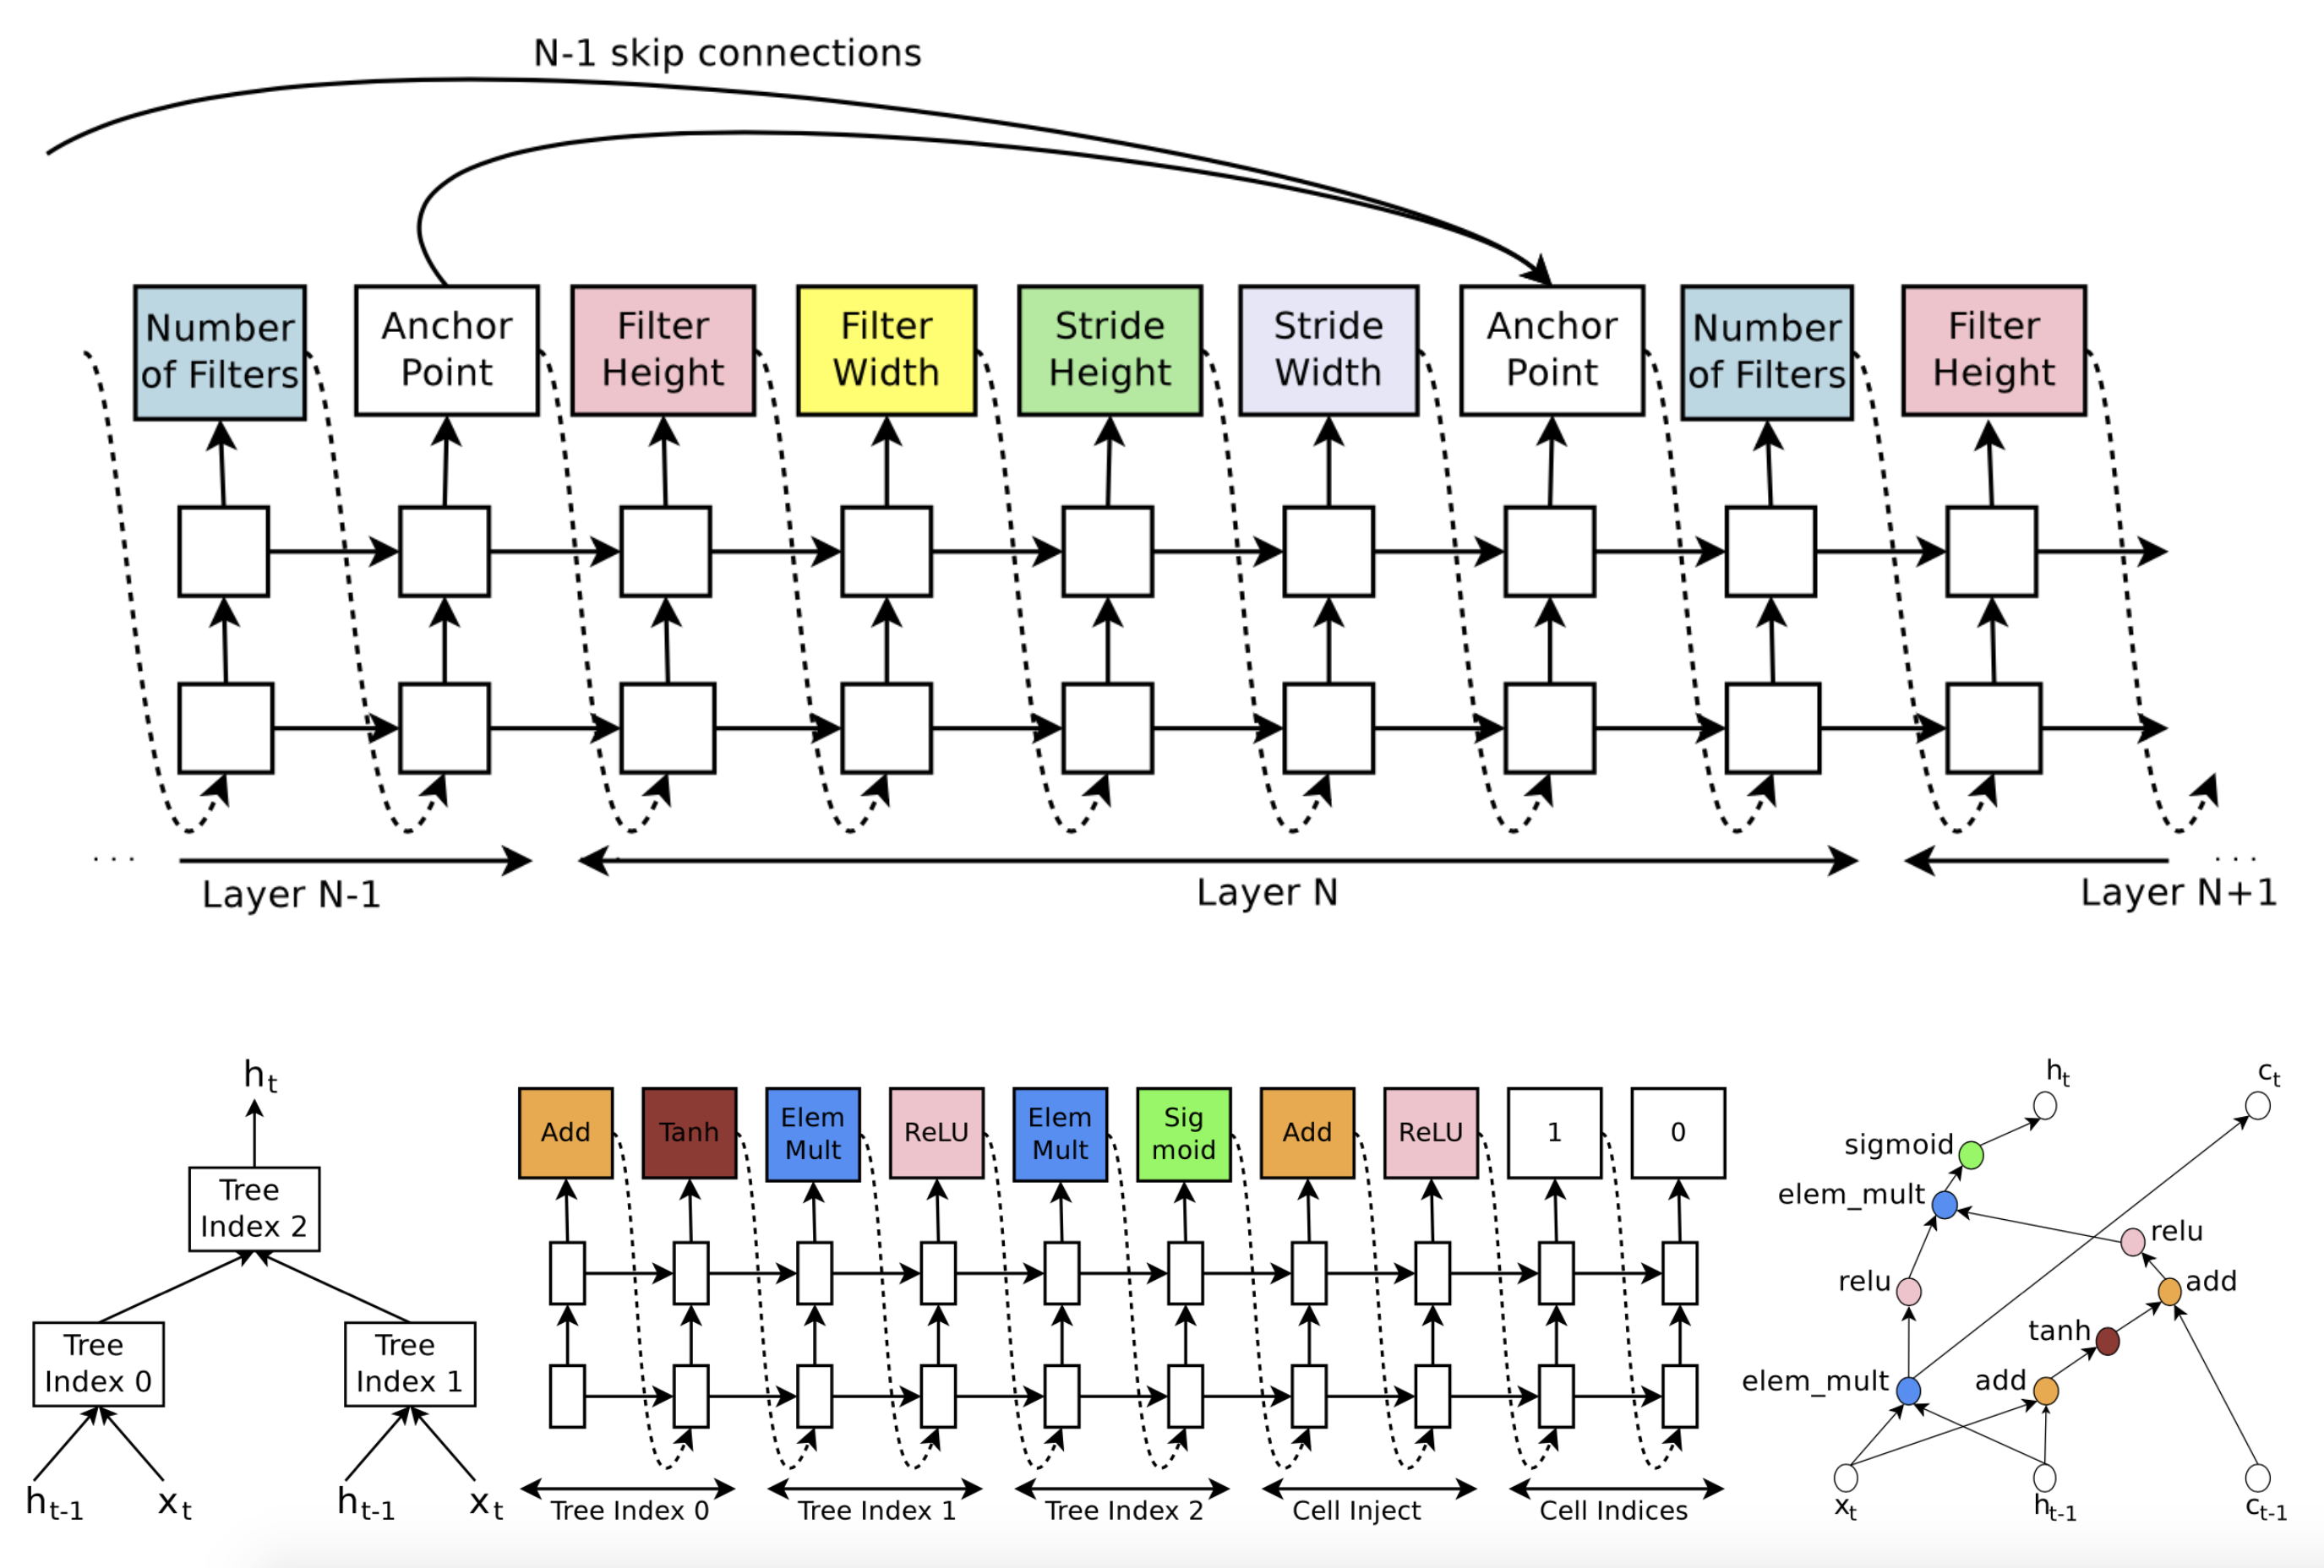

We defined a search space for a neural network architecture using a dictionary. Each key represents a hyperparameter such as filter size, kernel size, learning rate, and number of units. The corresponding values specify the type of hyperparameter (`'choice'` or `'uniform'`) and the possible values or range of values. This search space serves as a framework for conducting hyperparameter optimization to find the optimal configuration for the neural network model.

In [38]:
search_space = {
    "filter_size_c1" : {'_type' : 'choice', '_value' : [32,64,128]},
    "filter_size_c2" : {'_type' : 'choice', '_value' : [32,64,128]},
    
    "kernel_size_c1" : {'_type' : 'choice', '_value' : [3,5]},
    "kernel_size_c2" : {'_type' : 'choice', '_value' : [3,5]},
    
    "learning_rate" : {'_type' : 'uniform', '_value' : [0.001,0.01]},
    
    "nb_units" : {'_type' : 'choice', '_value' : [80,100,120]}
}
print(search_space)

{'filter_size_c1': {'_type': 'choice', '_value': [32, 64, 128]}, 'filter_size_c2': {'_type': 'choice', '_value': [32, 64, 128]}, 'kernel_size_c1': {'_type': 'choice', '_value': [3, 5]}, 'kernel_size_c2': {'_type': 'choice', '_value': [3, 5]}, 'learning_rate': {'_type': 'uniform', '_value': [0.001, 0.01]}, 'nb_units': {'_type': 'choice', '_value': [80, 100, 120]}}


In [39]:
NUM_CLASSES = 10

def load_data():

    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

    return (x_train, y_train), (x_test,y_test)

In [40]:
def create_model(params):

    model = Sequential([
    Conv2D(params['filter_size_c1'],params['kernel_size_c1'], activation= 'relu'),
    Conv2D(params['filter_size_c2'],params['kernel_size_c2'], activation= 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense (params['nb_units'], activation="relu"),
    Dense(NUM_CLASSES, activation='softmax')
           ])
    optimizer = keras.optimizers.Adam (learning_rate = params['learning'])
    model.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'],callbacks =[SendMetrics])

    return model

In [41]:
def run(params) :
    (x_train, y_train), (x_test, y_test) = load_data()
    model = create_model(params)
    model.fit(x_train, y_train, batch_size=200, epochs=10, validation_data=(x_test, y_test))
    nni.report_final_result(acc)


In [42]:
class SendMetrics(Callback) :
    def on_epoch_end(self, epoch, logs = None) :
        nni.report_intermediate_result(logs['val_accuracy'])

This Python code snippet demonstrates the setup and execution of a hyperparameter optimization experiment using NNI (Neural Network Intelligence). Below is a breakdown of each component:

1. **Importing NNI**: The line `from nni.experiment import Experiment` imports the Experiment class from the NNI library. NNI is an open-source AutoML toolkit developed by Microsoft Research for automating machine learning model training and hyperparameter tuning.

2. **Initializing Experiment**: An Experiment object is created by calling `Experiment("local")`. This initializes a local experiment, meaning that the hyperparameter optimization process will be executed locally on the current machine.

3. **Configuring Trial Command and Directory**: 
   - `experiment.config.trial_command = "python model.py"`: This line specifies the command to execute for each trial of the experiment. In this case, it runs a Python script named `model.py`. This script likely contains the definition and training of the neural network model.
   - `experiment.config.trial_code_directory = '.'`: This line sets the directory where the trial command will be executed. Here, it is set to the current directory.

4. **Defining Search Space**: 
   - `experiment.config.search_space = search_space`: This line assigns the previously defined `search_space` dictionary to the `search_space` attribute of the experiment configuration. This search space defines the hyperparameters that will be tuned during the optimization process.

5. **Configuring Tuner**: 
   - `experiment.config.tuner.name = "TPE"`: This line specifies the name of the tuner algorithm to be used for hyperparameter optimization. TPE (Tree-structured Parzen Estimator) is a popular Bayesian optimization algorithm commonly used for hyperparameter tuning.

6. **Setting Trial Concurrency and Max Trials**: 
   - `experiment.config.trial_concurrency = 1`: This line sets the number of trials to be executed concurrently. In this case, only one trial will be executed at a time.
   - `experiment.config.max_trial_number = 10`: This line specifies the maximum number of trials to be executed during the hyperparameter optimization process. Here, it is set to 10 trials.

7. **Running Experiment**: 
   - `experiment.run(80)`: This line starts the execution of the hyperparameter optimization experiment. The argument `80` specifies the maximum time budget in seconds for the experiment. Once started, NNI will iteratively execute trials, evaluate their performance, and update the search space based on the tuner algorithm until the maximum time budget or maximum trial number is reached.

Overall, this code snippet sets up and runs a hyperparameter optimization experiment using NNI, allowing for automated tuning of neural network hyperparameters to find the optimal configuration for the specified task.

In [43]:
from nni.experiment import Experiment 

experiment = Experiment("local")
experiment.config.trial_command = "python model.py"
experiment.config.trial_code_directory = '.'
experiment.config.search_space = search_space
experiment.config.tuner.name = "TPE"
experiment.config.trial_concurrency = 1
experiment.config.max_trial_number = 10
experiment.run(30) 

[2024-04-27 22:54:29] Creating experiment, Experiment ID: rp0j2as9
[2024-04-27 22:54:29] Starting web server...
[2024-04-27 22:54:30] Setting up...
[2024-04-27 22:54:30] Web portal URLs: http://192.168.56.1:30 http://169.254.83.111:30 http://172.17.0.86:30 http://192.168.137.1:30 http://192.168.137.236:30 http://127.0.0.1:30
[2024-04-27 23:17:47] WARNING: KeyboardInterrupt detected
[2024-04-27 23:17:47] Stopping experiment, please wait...
[2024-04-27 23:17:47] Saving experiment checkpoint...
[2024-04-27 23:17:47] Stopping NNI manager, if any...
[2024-04-27 23:17:49] Experiment stopped.


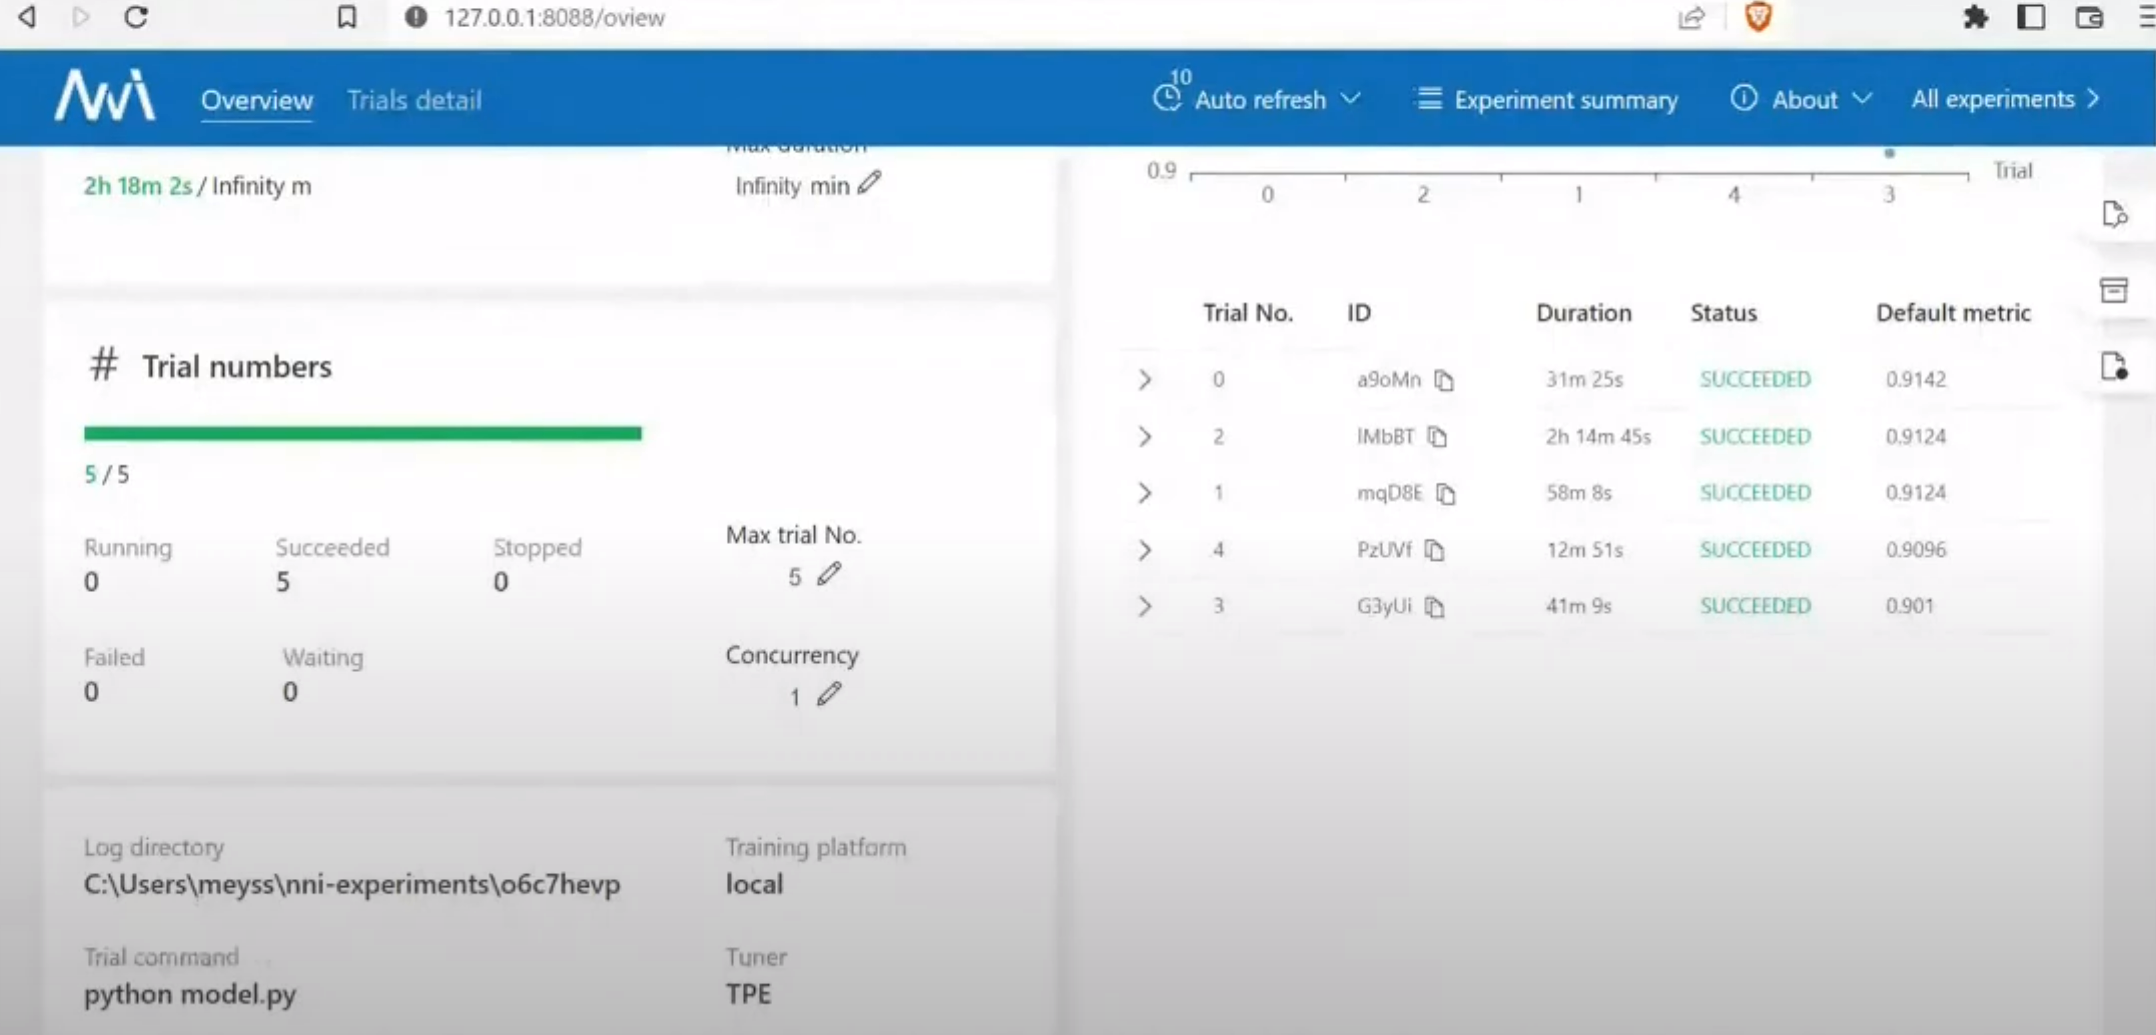

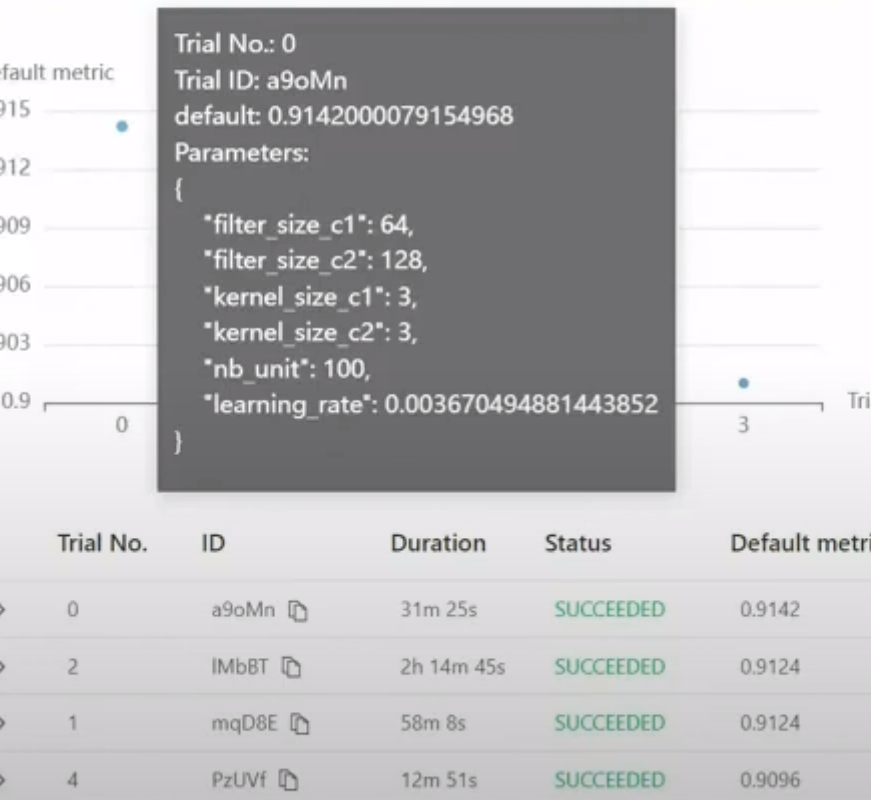

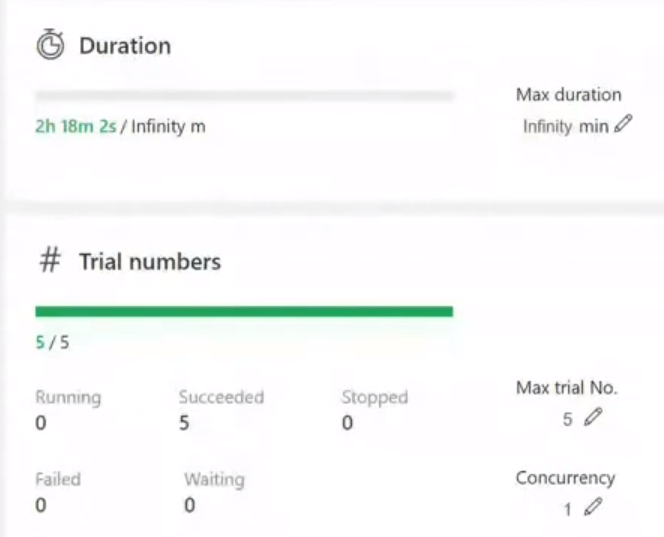

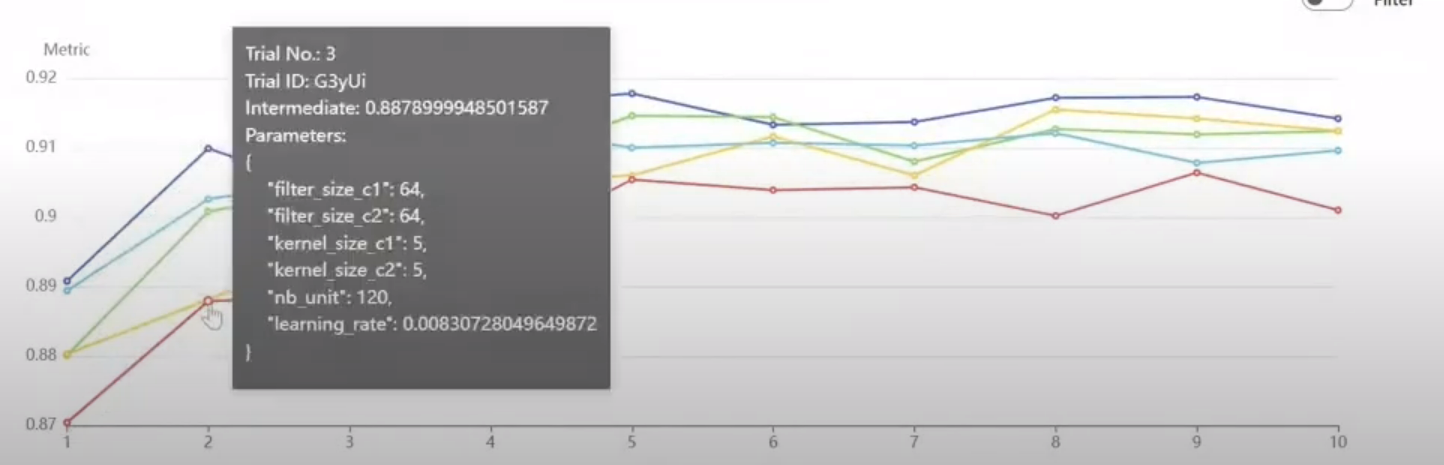